Author: [Louis Owen](https://louisowen6.github.io/)

# Grid Search

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
param_1_list = [i for i in range(2, 100)]
param_2_list = [i for i in range(5, 100)]

In [ ]:
results_dict = {}
for param_1 in param_1_list:
    for param_2 in param_2_list:
        
        ###################################################################
        # put your ml training code here
        # save the results
        ###################################################################

        #Remove this code later
        results = np.random.uniform(0,1)

        results_dict[(param_1,param_2)] = {'score':results}

In [ ]:
df_results = pd.DataFrame(results_dict).T.reset_index()
df_results.columns = ['param_1','param_2','score']
df_results.sort_values(['score'],ascending=False)

,param_1,param_2,score
7443,80,38,0.999901
3915,43,25,0.999607
8748,94,13,0.999464
560,7,90,0.999265
6114,66,39,0.999264
...,...,...,...
720,9,60,0.000270
6981,75,51,0.000211
7553,81,53,0.000152
9071,97,51,0.000084


# Random Search

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterSampler

In [ ]:
# Number of random search iterations
TUNE_ITER = 200

# List of parameters to be chosen by Random Search
param_grid = {'param_1': [i for i in range(2, 100)], 
              'param_2': [i for i in range(5, 100)],
              'param_3':list(np.linspace(0,1,100))
              }
param_list = list(ParameterSampler(param_grid, n_iter=TUNE_ITER,random_state=0))

# Searching the Best Parameters
results_dict = {}
for tune_iter in range(TUNE_ITER):
    # Get the set of parameter for this iteration
    strategy_params = param_list[tune_iter]

    ###################################################################
    # put your ml training code here
    # save the results
    ###################################################################

    #Remove this code later
    results = np.random.uniform(0,1)

    results_dict[tuple(strategy_params.values())] = {'score':results}

In [ ]:
df_results = pd.DataFrame(results_dict).T.reset_index()
df_results.columns = list(strategy_params.keys()) + ['score']
df_results.sort_values(['score'],ascending=False)

,param_3,param_2,param_1,score
40,0.989899,89,51,0.999034
49,0.282828,29,52,0.979626
120,0.454545,80,65,0.974745
64,0.797980,38,67,0.971236
163,0.040404,44,10,0.966068
...,...,...,...,...
66,0.898990,26,83,0.014485
21,0.333333,46,95,0.008018
198,0.131313,87,36,0.006983
196,0.121212,34,35,0.002384


# Coarse to Fine Search

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterSampler

import random
random.seed(1)

In [ ]:
grid_size = 100
tune_iter = 500
num_epochs = 5
worse_score = 0

init_param_grid = {'param_1': [i for i in range(2, 10)], 
                   'param_2': [i for i in range(5, 10)],
                   'param_3':list(np.linspace(0,1,grid_size))
                  }

new_param_grid = init_param_grid.copy()
best_params_dict = {'score':worse_score,'params':[]}
tried_params_list = []

for epoch in range(num_epochs):

    # List of sampled hyperparameter combinations will be used for random search
    param_list = list(ParameterSampler(new_param_grid, n_iter=TUNE_ITER,random_state=0))
    
    # Searching the Best Parameters with Random Search
    rs_results_dict = {}
    for tune_iter in range(TUNE_ITER):
        # Get the set of parameter for this iteration
        strategy_params = param_list[tune_iter]

        ###################################################################
        # put your ml training code here
        # save the results
        ###################################################################

        #Remove this code later
        results = np.random.uniform(0,1)

        rs_results_dict[tuple(strategy_params.values())] = {'score':results}

        if results > best_params_dict['score']:
            best_params_dict['score'] = results
            best_params_dict['params'] = list(strategy_params.values())

    # Save the results in dataframe and sort it based on score
    df_rs_results = pd.DataFrame(rs_results_dict).T.reset_index()
    df_rs_results.columns = list(strategy_params.keys()) + ['score']
    df_rs_results = df_rs_results.sort_values(['score'],ascending=False).head(num_epochs-epoch)
    
    # If the best score from this epoch is worse than the best score, 
    # then append the best hyperaparameters combination to this epoch dataframe
    if df_rs_results['score'].iloc[0] < best_params_dict['score']:
        new_row_dict = {}
        new_row_dict['score'] = best_params_dict['score']
        for idx, key in enumerate(init_param_grid):
            new_row_dict[key] = best_params_dict['params'][idx]

        df_rs_results = df_rs_results.append(new_row_dict,ignore_index=True)
        df_rs_results = df_rs_results.sort_values(['score'],ascending=False).head(num_epochs-epoch)

    display(df_rs_results)
    print(df_rs_results.head(1).T.to_dict())
    
    # Get the worse and best hyperparameter combinations 
    df_rs_results_min = df_rs_results[df_rs_results['score']>worse_score].min(axis=0)
    df_rs_results_max = df_rs_results[df_rs_results['score']>worse_score].max(axis=0)
    
    # Generate new hyperparameter space based on current worse and best hyperparameter combinations
    for key in init_param_grid:
        if isinstance(init_param_grid[key][0],int):
            new_param_grid[key] = np.unique([i for i in range(int(df_rs_results_min[key]), int(df_rs_results_max[key])+1)])
        elif isinstance(init_param_grid[key][0],float):
            new_param_grid[key] = np.unique(np.linspace(df_rs_results_min[key], df_rs_results_max[key], grid_size))
        else:
            new_param_grid[key] = init_param_grid[key]
    
    # Decrease the tuning iteration for random search
    TUNE_ITER = int(TUNE_ITER - epoch * TUNE_ITER/num_epochs)

,param_3,param_2,param_1,score
131,0.040404,9,6,0.997195
37,0.606061,9,8,0.996546
102,0.323232,9,6,0.975205
164,0.404040,8,6,0.972068
10,0.787879,6,6,0.969271


{131: {'param_3': 0.04040404040404041, 'param_2': 9.0, 'param_1': 6.0, 'score': 0.9971947128926484}}


,param_3,param_2,param_1,score
4,6.000000,9.0,0.040404,0.997195
0,0.349964,7.0,8.000000,0.995359
1,0.697276,6.0,7.000000,0.994160
2,0.078155,9.0,8.000000,0.992682


{4: {'param_3': 6.0, 'param_2': 9.0, 'param_1': 0.04040404040404041, 'score': 0.9971947128926484}}


,param_3,param_2,param_1,score
3,6.000000,9.0,0.040404,0.997195
0,3.248436,7.0,6.000000,0.996493
1,4.863484,6.0,4.000000,0.986835


{3: {'param_3': 6.0, 'param_2': 9.0, 'param_1': 0.04040404040404041, 'score': 0.9971947128926484}}


,param_3,param_2,param_1,score
2,6.000000,9.0,0.040404,0.997195
0,4.971638,7.0,5.000000,0.991502


{2: {'param_3': 6.0, 'param_2': 9.0, 'param_1': 0.04040404040404041, 'score': 0.9971947128926484}}


,param_3,param_2,param_1,score
1,6.0,9.0,0.040404,0.997195


{1: {'param_3': 6.0, 'param_2': 9.0, 'param_1': 0.04040404040404041, 'score': 0.9971947128926484}}


# Bayesian Search

## Scikit-Optimize

If you want to apply it using cross validation with the Scikit-learn pipeline, then the implementation from [scikit-optimize](https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html) is a good option.

## Hyperopt

If you want to apply it on custom pipeline, [Hyperopt](https://github.com/hyperopt/hyperopt) is a good option.

In [ ]:
!pip install hyperopt

In [ ]:
import numpy as np
from hyperopt import fmin, tpe, space_eval, hp

In [ ]:
# Hyperopt use the probabilities for each hyperparameter value on the hyperparameter space dictionary 
# instead of the absolute point values themself 

space = {'param_1': hp.quniform('param_1',2,100,1), 
        'param_2': hp.quniform('param_2',5,100,1),
        'param_3': hp.lognormal('param_3',0,1)
        }

In [ ]:
# Set up objective function
def objective(params):
    params = {'param_1': int(params['param_1']),
              'param_2': int(params['param_2']),
              'param_3': params['param_3']
              }

    ###################################################################
    # put your ml training code here
    # save the results
    ###################################################################
    
    #Remove this code later
    results = np.random.uniform(0,1)

    return 1-results

In [ ]:
# minimize the objective over the space

best = fmin(objective, space, 
            algo=tpe.suggest, 
            max_evals=200,
            rstate=np.random.RandomState(42)
            )

100%|██████████| 200/200 [00:03<00:00, 54.06it/s, best loss: 0.01868585451423055]


In [ ]:
print(best)

{'param_1': 61.0, 'param_2': 95.0, 'param_3': 7.4555815685587365}


## Bayes_opt

Another package you can utilized is [bayes_opt](https://github.com/fmfn/BayesianOptimization)

In [ ]:
!pip install bayesian-optimization

In [ ]:
import numpy as np
from bayes_opt import BayesianOptimization

In [ ]:
def black_box_function(param_1,param_2,param_3):
    """Your ML model function which outputs the performance result
    """

    ###################################################################
    # put your ml training code here
    # save the results
    ###################################################################

    #Remove this code later
    results = np.random.uniform(0,1)

    return results

In [ ]:
# Bounded region of parameter space
pbounds = {'param_1': (2, 4), 'param_2': (-3, 3), 'param_3': (-5, -1)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

In [ ]:
optimizer.maximize(
    init_points=2, #How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    n_iter=100, #How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
)

|   iter    |  target   |  param_1  |  param_2  |  param_3  |
-------------------------------------------------------------
|  1        |  0.4581   |  2.834    |  1.322    | -5.0      |
|  2        |  0.248    |  2.605    | -2.119    | -4.631    |
|  3        |  0.01688  |  4.0      |  3.0      | -1.0      |
|  4        |  0.1195   |  2.0      |  3.0      | -5.0      |
|  5        |  0.5159   |  4.0      | -3.0      | -1.0      |
|  6        |  0.01621  |  2.0      | -0.7335   | -1.0      |
|  7        |  0.4956   |  4.0      | -0.3744   | -5.0      |
|  8        |  0.798    |  4.0      |  3.0      | -5.0      |
|  9        |  0.6483   |  4.0      |  1.875    | -3.931    |
|  10       |  0.9285   |  4.0      |  1.998    | -5.0      |
|  11       |  0.4536   |  2.0      | -3.0      | -1.0      |
|  12       |  0.4571   |  3.966    | -2.99     | -4.939    |
|  13       |  0.8229   |  4.0      |  1.508    | -5.0      |
|  14       |  0.697    |  4.0      | -3.0      | -2.907    |
|  15   

In [ ]:
print(optimizer.max)

{'target': 0.9997545176762149, 'params': {'param_1': 4.0, 'param_2': 0.3081850437623929, 'param_3': -3.917459524746716}}


# Genetic Algorithm

In [ ]:
!pip install deap

     |████████████████████████████████| 160 kB 16.7 MB/s 


In [ ]:
import numpy as np
import random
import time
from tqdm import trange
from deap import base
from deap import creator
from deap import tools

import matplotlib.pyplot as plt
import seaborn as sns

 10%|█         | 2/20 [00:00<00:03,  4.58it/s]

HALL OF FAME:
    0: [79, 5, 0.472167032302811], Fitness: 0.9996828645486484
    1: [24, 34, 0.2670909788441129], Fitness: 0.9994965142856782
    2: [91, 146, 0.5264383975391388], Fitness: 0.9992044910433694
HALL OF FAME:
    0: [46, 35, 0.2118935955467327], Fitness: 0.9999095900592636
    1: [79, 5, 0.472167032302811], Fitness: 0.9996828645486484
    2: [24, 34, 0.2670909788441129], Fitness: 0.9994965142856782


 20%|██        | 4/20 [00:00<00:02,  5.47it/s]

HALL OF FAME:
    0: [46, 35, 0.2118935955467327], Fitness: 0.9999095900592636
    1: [12, 7, 0.09048843869574763], Fitness: 0.9996892261268593
    2: [79, 5, 0.472167032302811], Fitness: 0.9996828645486484
HALL OF FAME:
    0: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
    1: [46, 35, 0.2118935955467327], Fitness: 0.9999095900592636
    2: [93, 22, 0.472167032302811], Fitness: 0.9998437865800086


 30%|███       | 6/20 [00:01<00:02,  4.89it/s]

HALL OF FAME:
    0: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
    1: [81, 70, 0.8920297743130984], Fitness: 0.9999678473547975
    2: [46, 35, 0.2118935955467327], Fitness: 0.9999095900592636
HALL OF FAME:
    0: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
    1: [81, 70, 0.8920297743130984], Fitness: 0.9999678473547975
    2: [46, 35, 0.2118935955467327], Fitness: 0.9999095900592636


 40%|████      | 8/20 [00:01<00:02,  5.27it/s]

HALL OF FAME:
    0: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
    1: [81, 70, 0.8920297743130984], Fitness: 0.9999678473547975
    2: [86, 80, 0.5098704813589856], Fitness: 0.9999372283606897
HALL OF FAME:
    0: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
    1: [81, 70, 0.8920297743130984], Fitness: 0.9999678473547975
    2: [86, 80, 0.5098704813589856], Fitness: 0.9999372283606897


 50%|█████     | 10/20 [00:02<00:01,  5.01it/s]

HALL OF FAME:
    0: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
    1: [81, 70, 0.8920297743130984], Fitness: 0.9999678473547975
    2: [86, 80, 0.5098704813589856], Fitness: 0.9999372283606897
HALL OF FAME:
    0: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
    1: [81, 70, 0.8920297743130984], Fitness: 0.9999678473547975
    2: [86, 80, 0.5098704813589856], Fitness: 0.9999372283606897


 60%|██████    | 12/20 [00:02<00:01,  5.23it/s]

HALL OF FAME:
    0: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    1: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
    2: [81, 70, 0.8920297743130984], Fitness: 0.9999678473547975
HALL OF FAME:
    0: [38, 52, 0.012300933006653136], Fitness: 0.9999889678015843
    1: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    2: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376


 70%|███████   | 14/20 [00:02<00:01,  5.01it/s]

HALL OF FAME:
    0: [38, 52, 0.012300933006653136], Fitness: 0.9999889678015843
    1: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    2: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
HALL OF FAME:
    0: [38, 52, 0.012300933006653136], Fitness: 0.9999889678015843
    1: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    2: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376


 80%|████████  | 16/20 [00:03<00:00,  5.38it/s]

HALL OF FAME:
    0: [38, 52, 0.012300933006653136], Fitness: 0.9999889678015843
    1: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    2: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
HALL OF FAME:
    0: [38, 52, 0.012300933006653136], Fitness: 0.9999889678015843
    1: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    2: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376


 90%|█████████ | 18/20 [00:03<00:00,  4.96it/s]

HALL OF FAME:
    0: [38, 52, 0.012300933006653136], Fitness: 0.9999889678015843
    1: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    2: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
HALL OF FAME:
    0: [38, 52, 0.012300933006653136], Fitness: 0.9999889678015843
    1: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    2: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376


100%|██████████| 20/20 [00:03<00:00,  5.03it/s]

HALL OF FAME:
    0: [38, 52, 0.012300933006653136], Fitness: 0.9999889678015843
    1: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    2: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
HALL OF FAME:
    0: [38, 52, 0.012300933006653136], Fitness: 0.9999889678015843
    1: [23, 100, 0.18267513223550358], Fitness: 0.9999825376092393
    2: [35, 46, 0.5336817824367446], Fitness: 0.999980481093376
Time Elapsed: 4.02


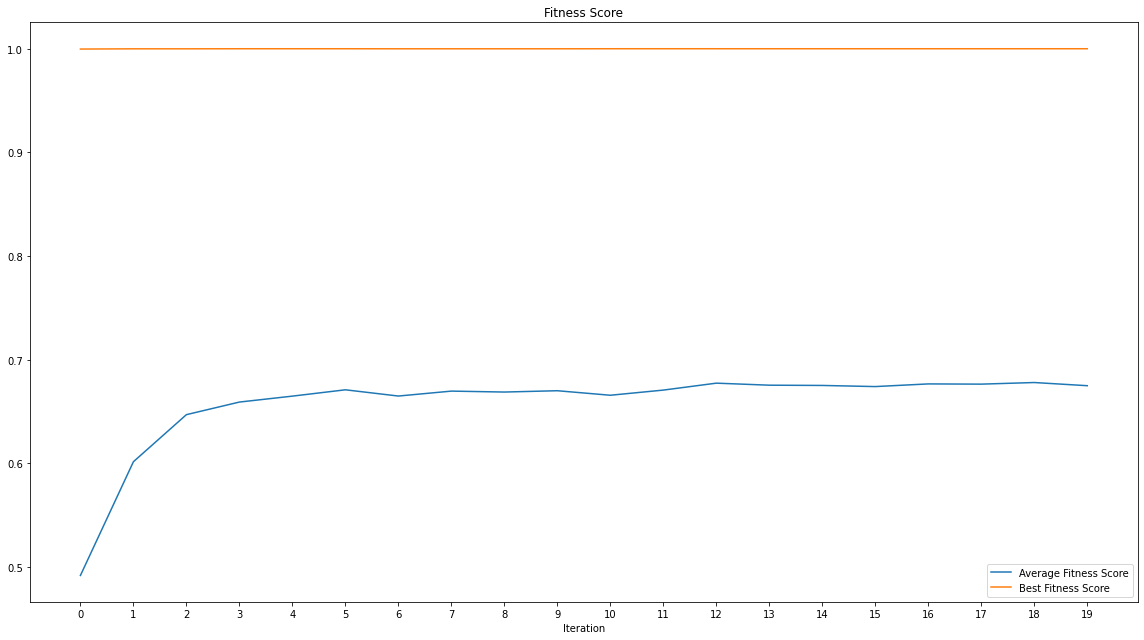

In [ ]:
NPOP = 5_000
NGEN = 20
CXPB = 0.5
MUTPB = 0.15

# fix the seed for reproducibility
# feel free to change it or comment out the line
random.seed(1)

# GA parameters
PARAM_NAMES = ["param_1","param_2","param_3"]

def evaluate(individual, plot=False, log=False):
    # convert list of parameter values into dictionary of kwargs
    strategy_params = {k: v for k, v in zip(PARAM_NAMES, individual)}

    ###################################################################
    # put your ml training code here
    # save the results
    ###################################################################

    #Remove this code later
    results = np.random.uniform(0,1)

    return [results]


# our fitness score is supposed to be maximised and there is only 1 objective
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# our individual is a list of genes, with the fitness score the higher the better
creator.create("Individual", list, fitness=creator.FitnessMax)

# Intialize toolbox
toolbox = base.Toolbox()

# # use parallel processing
# pool = multiprocessing.Pool(14)
# toolbox.register("map", pool.map)

# register some handy functions for calling
toolbox.register("indices", random.sample, range(NPOP), NPOP)
# crossover strategy
toolbox.register("mate", tools.cxUniform, indpb=CXPB)
# mutation strategy
toolbox.register("mutate", tools.mutUniformInt, low=1, up=151, indpb=0.2)
# selection strategy
toolbox.register("select", tools.selTournament, tournsize=3)
# fitness function
toolbox.register("evaluate", evaluate)

# definition of an individual & a population
toolbox.register("param_1", random.randint, 1, 100)
toolbox.register("param_2", random.randint, 5, 100)
toolbox.register("param_3", random.uniform, 0, 1)


toolbox.register(
    "individual",
    tools.initCycle,
    creator.Individual,
    (
        toolbox.param_1,
        toolbox.param_2,
        toolbox.param_3
    ),
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

mean = np.ndarray(NGEN)
best = np.ndarray(NGEN)
hall_of_fame = tools.HallOfFame(maxsize=3)

t = time.perf_counter()
pop = toolbox.population(n=NPOP)
for g in trange(NGEN):
    # Select the next generation individuals
    offspring = toolbox.select(pop, len(pop))
    # Clone the selected individuals
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Apply mutation on the offspring
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # The population is entirely replaced by the offspring
    pop[:] = offspring
    hall_of_fame.update(pop)
    print(
        "HALL OF FAME:\n"
        + "\n".join(
            [
                f"    {_}: {ind}, Fitness: {ind.fitness.values[0]}"
                for _, ind in enumerate(hall_of_fame)
            ]
        )
    )

    fitnesses = [
        ind.fitness.values[0] for ind in pop if not np.isinf(ind.fitness.values[0])
    ]
    mean[g] = np.mean(fitnesses)
    best[g] = np.max(fitnesses)

end_t = time.perf_counter()
print(f"Time Elapsed: {end_t - t:,.2f}")

fig, ax = plt.subplots(sharex=True, figsize=(16, 9))

sns.lineplot(x=range(NGEN), y=mean, ax=ax, label="Average Fitness Score")
sns.lineplot(x=range(NGEN), y=best, ax=ax, label="Best Fitness Score")
ax.set_title("Fitness Score")
ax.set_xticks(range(NGEN))
ax.set_xlabel("Iteration")

plt.tight_layout()
plt.show()

params = {}
for idx_hof, param_name in enumerate(PARAM_NAMES):
    params[param_name] = hall_of_fame[0][idx_hof]

In [ ]:
print(params)

{'param_1': 38, 'param_2': 52, 'param_3': 0.012300933006653136}
